<a href="https://colab.research.google.com/github/Sir-Dre/AI-Security-Privacy/blob/main/Implementing_a_CNN_for_the_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8729 - loss: 0.4221 - val_accuracy: 0.9814 - val_loss: 0.0597
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9788 - loss: 0.0696 - val_accuracy: 0.9882 - val_loss: 0.0360
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9861 - loss: 0.0471 - val_accuracy: 0.9896 - val_loss: 0.0286
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9895 - loss: 0.0341 - val_accuracy: 0.9898 - val_loss: 0.0284
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9909 - loss: 0.0289 - val_accuracy: 0.9919 - val_loss: 0.0244
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9936 - loss: 0.0220 - val_accuracy: 0.9914 - val_loss: 0.0271
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9937 - loss: 0.0190 - val_accuracy: 0.9914 - val_loss: 0.0265
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step

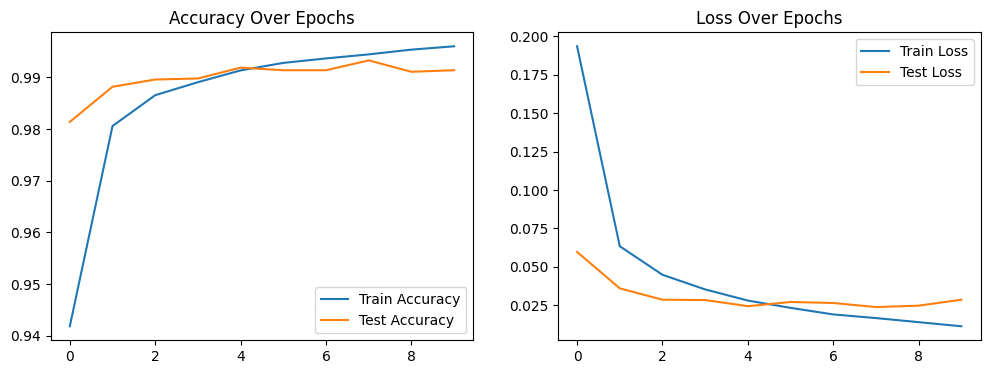

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define CNN model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()
